__Compare FWI result with true model for the Overthrust model__

Daniel Köhn 
Kiel, 16/07/2016

__Import Libraries__

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage.filters import gaussian_filter
import pickle

**Import external colormap**

In [30]:
fp = open('../cmap_cm.pkl', 'rb')
my_cmap = pickle.load(fp)
fp.close()

__FD grid dimensions__

In [31]:
DH = 0.05
NX = 1952
NY = 1392
stage = 11

__Define fonts__

In [32]:
FSize = 15
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 16, 9

**Read acquisition geometry**

In [33]:
# source positions
srcname = "../../source/source_kleinneudorf_s140.dat"
src_data = np.loadtxt(srcname, delimiter='\t', skiprows=1, unpack=False)

# receiver positions
recname = "../../receiver/receiver_kleinneudorf_s140.dat"
rec_data1 = np.loadtxt(recname, delimiter='\t', skiprows=1, unpack=False)

** Intersection point of p500 and p100**

In [34]:
# Estimate minimum and maximum x-values
minsrc = np.min(src_data[:,0])
minrec1 = np.min(rec_data1[:,0])

print("minsrc = ", minsrc, ", minrec1 = ", minrec1)

maxsrc = np.max(src_data[:,0])
maxrec1 = np.max(rec_data1[:,0])

print("maxsrc = ", maxsrc, ", maxrec1 = ", maxrec1)

# Estimate global maximum and minimum values
#maxacq = np.max([maxsrc, maxrec1, maxrec2])
#minacq = np.min([minsrc, minrec1, minrec2])

maxacq = np.max([maxrec1])
minacq = np.min([minrec1])

print("maxacq = ", maxacq, ", minacq = ", minacq)

minsrc =  2.98 , minrec1 =  2.25
maxsrc =  96.11 , maxrec1 =  96.83
maxacq =  96.83 , minacq =  2.25


In [35]:
# calculate intersection point p500, s140
rel_int = 0.4922

x_p500_s140_int = minacq + rel_int * (maxacq - minacq)
print("x_p500_s140_int = ",x_p500_s140_int)

# calculate intersection point long-west, s140
rel_int = 0.051

x_long_west_s140_int = minacq + rel_int * (maxacq - minacq)
print("x_long_west_s140_int = ",x_long_west_s140_int)

x_p500_s140_int =  48.802276
x_long_west_s140_int =  7.07358


__Read FWI result and true model__

In [36]:
f = open("11_01_2019_s140_fmax_80Hz_gauss_var_sx_1p5_sz_0p5_full_offset/modelTest_vs_stage_" + str(stage) + ".bin")
data_type = np.dtype ('float32').newbyteorder ('<')
mod_true = np.fromfile (f, dtype=data_type)
mod_true = mod_true.reshape(NX,NY)
mod_true = np.transpose(mod_true)
mod_true = np.flipud(mod_true)

In [37]:
f = open("11_01_2019_s140_fmax_80Hz_gauss_var_sx_1p5_sz_0p5_full_offset/modelTest_vs_stage_" + str(stage) + ".bin")
data_type = np.dtype ('float32').newbyteorder ('<')
fwi = np.fromfile (f, dtype=data_type)
fwi = fwi.reshape(NX,NY)
fwi = np.transpose(fwi)
fwi = np.flipud(fwi)

__Find minimum values > 0__

In [38]:
EST_MINMAX = 0
if(EST_MINMAX==1):
    
    vsmin = 1e9
    rhomin = 1e9

    for i in range(0,NY-1):
        for j in range(0,NX-1):
        
            if(fwi[i,j]<vsmin and fwi[i,j] > 0.0):
                rhomin = fwi[i,j]
            
    for i in range(0,NY-1):
        for j in range(0,NX-1):
        
            if(mod_true[i,j]<vsmin and mod_true[i,j] > 0.0):
                vsmin = mod_true[i,j]
            
    print("vsmin = ", vsmin)
    print("rhomin = ", rhomin)

print("vsmax = ", np.max(mod_true))
print("rhomax = ", np.max(fwi))

vsmax =  923.379
rhomax =  923.379


__Wavefield clip value__ 

In [39]:
# Parameters from p500 FWI result
vsmin = 43.0
vsmax = 749.0
rhomin = 1550.0
rhomax = 2455.0

# Parameters from pnorte FWI result
#vsmin = 100.0
#vsmax = 710.0
#rhomin = 1550.0
#rhomax = 2380.0

# Parameters from p100 FWI result
#vsmin = 43.0
#vsmax = 890.0
#rhomin = 1550.0
#rhomax = 2241.0

__Define Axis__

In [40]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)

__Define SubPlot__

In [41]:
def do_plot(n, model, cm, an, an1, title, vpmin, vpmax):
    
    ax=plt.subplot(1, 1, n)
    
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})    
    rc('text', usetex=True)
    
    # plot FWI result
    im1 = plt.imshow(model, cmap=cm, interpolation='none', extent=[0.0,NX*DH,0.0,NY*DH], vmin=vpmin, vmax=vpmax, aspect=1)
    
    # mark outcrop by arrow
    #arr = plt.arrow(x_p500_out_int, 0, 0, 1.55, edgecolor='black', head_width=3, head_length=4, color='blue')
    
    # plot source and receiver positions
    #plt.plot(src_data[:,0],src_data[:,2],'r+')
    #plt.plot(rec_data1[:,0],rec_data1[:,1],'bv')
    #plt.plot(rec_data2[:,0],rec_data2[:,1],'bv')
    
    # plot p500-s140 intersection line
    plt.plot([x_p500_s140_int,x_p500_s140_int],[0.0,NY*DH],'k-')
    
    # plot long_west-s140 intersection line
    plt.plot([x_long_west_s140_int,x_long_west_s140_int],[0.0,NY*DH],'k-')
    
    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    a.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    #a.add_patch(arr)
    #plt.axis('scaled')
    plt.title(title, fontdict=font)
    plt.ylabel('Depth [m]', fontdict=font)
    plt.xlabel('Distance [m]', fontdict=font)
    plt.ylim(0,50)
    plt.gca().invert_yaxis()
    #ax.xaxis.set_major_formatter(plt.NullFormatter())
    
    # add annotation
    #plt.text(4,50,an1,fontdict=font,color='white',size=20)
    
    # fit and label colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2.5%", pad=0.05)
    cbar = plt.colorbar(im1, cax=cax)
    cbar.set_label(an, fontdict=font, labelpad=3)

__Plot SubPlots__

C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


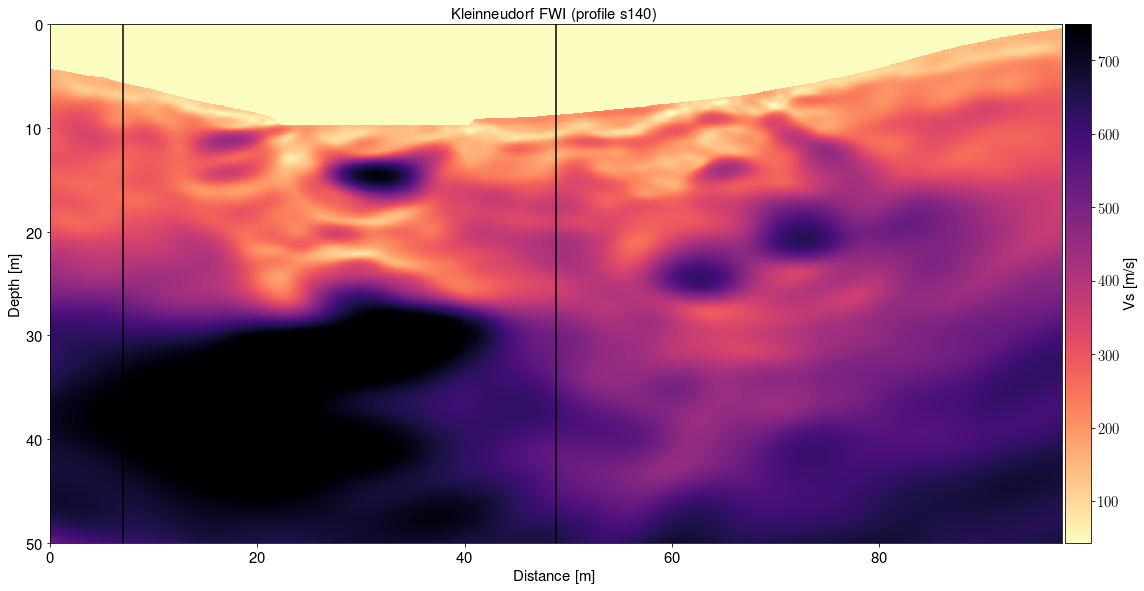

In [42]:
plt.close('all')
plt.figure()

#do_plot(1, mod_true, 'gist_gray_r', r'Vs [m/s]', '(a)', "Kleinneudorf FWI (profile 500)", vsmin, vsmax)
do_plot(1, mod_true, 'magma_r', r'Vs [m/s]', '(a)', "Kleinneudorf FWI (profile s140)", vsmin, vsmax)

#plt.savefig('stage_.png', bbox_inches='tight', format='png', dpi=100)
plt.savefig('stage_' + str(stage) + '.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('stage_' + str(stage) + '.png', bbox_inches='tight', format='png',dpi=100)
plt.tight_layout()
plt.show()